In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import json
import argparse
import os

plt.rcParams['axes.prop_cycle']
matplotlib.rcParams['font.family'] = 'Times New Roman'

RATIO=1.7

MARKER_SIZE = 10/RATIO
TEXT_SIZE = 14/RATIO

LINE_WIDTH = 2/RATIO
MARKER_EDGE_WITH=2/RATIO

GRAY = '#777777'
DARK_GRAY = '#333333'
PURPLE = '#988ED5'
BROWN = '#8C6D31'
DARK_GREEN = '#467821'
DEEP_DARK_BLUE = '#253494'
RED = '#FF0000'

LIGHT_DARK_GRAY = '#A6A6A6'  # Lightened version of DARK_GRAY
LIGHT_GRAY = '#D3D3D3'  # Lightened version of GRAY
LIGHT_PURPLE = '#D6CDEA'  # Lightened version of PURPLE
LIGHT_BROWN = '#D6B37E'  # Lightened version of BROWN
LIGHT_GREEN = '#A8D7A3'  # Lightened version of DARK_GREEN
LIGHT_BLUE = '#A3B9E1'  # Lightened version of DEEP_DARK_BLUE
LIGHT_RED = '#FF9999'  # Lightened version of RED

RATIO=1.7

MARKER_SIZE = 10/RATIO
TEXT_SIZE = 20/RATIO
COLORS = [GRAY, DARK_GRAY, PURPLE, BROWN, DARK_GREEN, DEEP_DARK_BLUE, RED]
LIGHT_COLORS = [LIGHT_GRAY, LIGHT_DARK_GRAY, LIGHT_PURPLE, LIGHT_BROWN, LIGHT_GREEN, LIGHT_BLUE, LIGHT_RED]


COLOR={'darkflpa2':LIGHT_RED, 'darkflpg': RED, 'eefl': BROWN, 'depthfl':BROWN, 'reefl': DARK_GREEN, 'inclusivefl': GRAY, 'scalefl': DEEP_DARK_BLUE, 'exclusivefl': DARK_GRAY}
MARKER={'darkflpa2':'none', 'darkflpg': 'none', 'eefl':'s', 'depthfl':'s', 'reefl': 'o', 'inclusivefl': '^', 'scalefl': 'D', 'exclusivefl': 'D'}
STYLE={'darkflpa2':'-', 'darkflpg': '-', 'eefl':'--', 'depthfl':'--', 'reefl': '--', 'inclusivefl': '--', 'scalefl': '--', 'exclusivefl': '--'}
NAMES = {'darkflpa2':'DarkDistill+', 'darkflpg': 'DarkDistill', 'eefl':'EEFL', 'depthfl':'DepthFL', 'reefl': 'ReeFL', 'inclusivefl': 'InclusiveFL', 'scalefl': 'ScaleFL', 'exclusivefl': 'ExclusiveFL'}


def args_parser():
    parser = argparse.ArgumentParser()

    # ===== Method Setting ======
    parser.add_argument('--suffix', type=str, default='dir')
    return parser.parse_args()

def budget(data, path, title, x_label, y_label, y_range=(), x_range=(),y_step=1, x_step=1, suffix=''):
    fig, ax = plt.subplots()

    for model_name in data.keys():
        # if model_name == 'scalefl' or model_name == 'exclusivefl':
        #     continue
        x = data[model_name]['flops']
        y = data[model_name]['test']
        
        plt.plot(x, y, color=COLOR[model_name], label=NAMES[model_name], marker=MARKER[model_name], linestyle=STYLE[model_name])


    if len(y_range) == 2:
        plt.ylim(*y_range)
        if y_step > 0:
            EPS = 1e-6
            plt.yticks(np.arange(y_range[0], y_range[1] + EPS, y_step), fontsize=TEXT_SIZE)    
    

    if len(x_range) == 2:
        plt.xlim(*x_range)
        if x_step > 0:
            EPS = 1e-6
            plt.xticks(np.arange(x_range[0], x_range[1] + EPS, x_step), fontsize=TEXT_SIZE)    
    plt.legend(loc='lower right')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # 显示图表
    plt.show()
    
    o_dir = suffix+'/budget/'
    t_dir = 'imgs/budget/'
    if not os.path.exists(o_dir):
        os.makedirs(o_dir)
    if not os.path.exists(t_dir):
        os.makedirs(t_dir)    
    plt.savefig(o_dir+path+'.png', dpi=300)
    plt.savefig(t_dir+path+'.png', dpi=300)
        

def round(data, path, title, x_label, y_label, y_range=(), x_range=(),y_step=1, x_step=1, suffix=''):
    fig, ax = plt.subplots()

    for model_name in data.keys():
        # if model_name == 'scalefl' or model_name == 'exclusivefl':
        #     continue
        x = [i*10 for i in range(50)]
        y = data[model_name]
        if 'loss' in title and 'scalefl' in model_name:
            y = [l*4 for l in y]
                
        plt.plot(x, y, color=COLOR[model_name], label=NAMES[model_name], linestyle=STYLE[model_name])


    if len(y_range) == 2:
        plt.ylim(*y_range)
        if y_step > 0:
            EPS = 1e-6
            plt.yticks(np.arange(y_range[0], y_range[1] + EPS, y_step), fontsize=TEXT_SIZE)    
    

    if len(x_range) == 2:
        plt.xlim(*x_range)
        if x_step > 0:
            EPS = 1e-6
            plt.xticks(np.arange(x_range[0], x_range[1] + EPS, x_step), fontsize=TEXT_SIZE)    
    plt.legend(loc='lower right')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # 显示图表
    plt.show()
    
    if 'Acc' in y_label:
        o_dir = suffix+'/acc/'
        t_dir = 'imgs/acc/'
    elif 'Loss' in y_label:
        o_dir = suffix+'/loss/'
        t_dir = 'imgs/loss/'
    if not os.path.exists(o_dir):
        os.makedirs(o_dir)
    if not os.path.exists(t_dir):
        os.makedirs(t_dir)    
    plt.savefig(o_dir+path+'.png', dpi=300)
    plt.savefig(t_dir+path+'.png', dpi=300)
        
    

def cifar_Full_1000():
    suffix = 'exps/BASE_CIFAR/full_boosted/noniid1000'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_eval' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    budget(data, path=f'CIFAR100_noniid1000_Full', title=f'CIFAR100_noniid1000_Full', x_label='Flops', y_label='Accuracy',
         y_range=(66.5, 72),
         x_range=(1.6, 4.0),
         suffix=suffix
         )
    
def cifar_LORA_1000():
    suffix = 'exps/BASE_CIFAR/lora_boosted/noniid1000'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_eval' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    budget(data, path=f'CIFAR100_noniid1000_LORA', title=f'CIFAR100_noniid1000_LORA', x_label='Flops', y_label='Accuracy',
         y_range=(65, 70),
         x_range=(2.2, 4.0),
         x_step=0.5,
         suffix=suffix
         )
  
def cifar_Full_1():
    suffix = 'exps/BASE_CIFAR/full_boosted/noniid1'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_eval' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    budget(data, path=f'CIFAR100_noniid1_Full', title=f'CIFAR100_noniid1_Full', x_label='Flops', y_label='Accuracy',
        y_range=(66, 70.5),
        x_range=(1.8, 4.0),
        suffix=suffix
        )
    
def cifar_LORA_1():
    suffix = 'exps/BASE_CIFAR/lora_boosted/noniid1'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_eval' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    budget(data, path=f'CIFAR100_noniid1_LORA', title=f'CIFAR100_noniid1_LORA', x_label='Flops', y_label='Accuracy',
         y_range=(65, 70),
         x_range=(2.2, 4.0),
         x_step=0.5,
         suffix=suffix
         )
  
def cifar_Full_01():
    suffix = 'exps/BASE_CIFAR/full_boosted/noniid0.1'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_eval' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    budget(data, path=f'CIFAR100_noniid0.1_Full', title=f'CIFAR100_noniid0.1_Full', x_label='Flops', y_label='Accuracy',
         y_range=(60, 66),
         x_range=(1.6, 4.0),
         suffix=suffix
         )
    
def cifar_LORA_01():
    suffix = 'exps/BASE_CIFAR/lora_boosted/noniid0.1'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_eval' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    budget(data, path=f'CIFAR100_noniid0.1_LORA', title=f'CIFAR100_noniid0.1_LORA', x_label='Flops', y_label='Accuracy',
         y_range=(50, 66),
         x_range=(1.5, 4.0),
         x_step=0.5,
         suffix=suffix
         )
   
  
def svhn_Full():
    suffix = 'exps/BASE_SVHN/full_boosted/noniid'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_eval' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    budget(data, path='SVHN_Full', title='SVHN_Full', x_label='Flops', y_label='Accuracy',
         y_range=(88, 89.5),
         y_step=0.5,
        #  x_range=(2.2, 4.0),
        #  x_step=0.5,
         suffix=suffix
         ) 
    
def svhn_LORA():
    suffix = 'exps/BASE_SVHN/lora_boosted/noniid'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_eval' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    budget(data, path='SVHN_LORA', title='SVHN_LORA', x_label='Flops', y_label='Accuracy',
         y_range=(83, 88),
        #  x_range=(2.2, 4.0),
        #  x_step=0.5,
         suffix=suffix
         )
           
def speechcmds_Full():
    suffix = 'exps/BASE_SPEECHCMDS/full_boosted'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_eval' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    budget(data, path='SpeechCmds_Full', title='SpeechCmds_Full', x_label='Flops', y_label='Accuracy',
        y_range=(91, 94),
        #  y_step=0.5,
        #  x_range=(2.2, 4.0),
        #  x_step=0.5,
         suffix=suffix
         ) 
    
def speechcmds_LORA():
    suffix = 'exps/BASE_SPEECHCMDS/lora_boosted'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_eval' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    budget(data, path='SpeechCmds_LORA', title='SpeechCmds_LORA', x_label='Flops', y_label='Accuracy',
        y_range=(87, 92),
        #  x_range=(2.2, 4.0),
        #  x_step=0.5,
         suffix=suffix
         )       




def cifar_Full_acc_1000():
    suffix = 'exps/BASE_CIFAR/full_boosted/noniid1000'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_acc' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    round(data, path=f'CIFAR100_noniid1000_Full', title=f'CIFAR100_noniid1000_Full_acc', x_label='Round', y_label='Accuracy',
        #  y_range=(54, 66),
        #  y_step=2,
        #  x_range=(1.6, 4.0),
         suffix=suffix
         )

def cifar_Full_acc_1():
    suffix = 'exps/BASE_CIFAR/full_boosted/noniid1'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_acc' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    round(data, path=f'CIFAR100_noniid1_Full', title=f'CIFAR100_noniid1_Full_acc', x_label='Round', y_label='Accuracy',
        #  y_range=(50, 66),
        #  y_step=2,
        #  x_range=(1.6, 4.0),
         suffix=suffix
         )

def cifar_Full_acc_01():
    suffix = 'exps/BASE_CIFAR/full_boosted/noniid0.1'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_acc' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    round(data, path=f'CIFAR100_noniid0.1_Full', title=f'CIFAR100_noniid0.1_Full_acc', x_label='Round', y_label='Accuracy',
        #  y_range=(54, 62),
        #  y_step=2,
        #  x_range=(1.6, 4.0),
         suffix=suffix
         )

def svhn_Full_acc():
    suffix = 'exps/BASE_SVHN/full_boosted/noniid'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_acc' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    round(data, path='SVHN_Full', title='SVHN_Full_acc', x_label='Round', y_label='Accuracy',
         y_range=(90, 95),
         y_step=2,
         suffix=suffix
         )

def speechcmds_Full_acc():
    suffix = 'exps/BASE_SPEECHCMDS/full_boosted'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_acc' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    round(data, path='SpeechCmds_Full', title='SpeechCmds_Full_acc', x_label='Round', y_label='Accuracy',
         y_range=(90.5, 93.6),
         y_step=0.5,
         suffix=suffix
         )


def cifar_Full_loss_1000():
    suffix = 'exps/BASE_CIFAR/full_boosted/noniid1000'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_loss' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    round(data, path=f'CIFAR100_noniid1000_Full', title=f'CIFAR100_noniid1000_Full_loss', x_label='Round', y_label='Loss',
        #  y_range=(54, 66),
        #  y_step=2,
        #  x_range=(1.6, 4.0),
         suffix=suffix
         )

def cifar_Full_loss_1():
    suffix = 'exps/BASE_CIFAR/full_boosted/noniid1'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_loss' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    round(data, path=f'CIFAR100_noniid1_Full', title=f'CIFAR100_noniid1_Full_loss', x_label='Round', y_label='Loss',
        #  y_range=(50, 66),
        #  y_step=2,
        #  x_range=(1.6, 4.0),
         suffix=suffix
         )

def cifar_Full_loss_01():
    suffix = 'exps/BASE_CIFAR/full_boosted/noniid0.1'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_loss' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    round(data, path=f'CIFAR100_noniid0.1_Full', title=f'CIFAR100_noniid0.1_Full_loss', x_label='Round', y_label='Loss',
        #  y_range=(54, 62),
        #  y_step=2,
        #  x_range=(1.6, 4.0),
         suffix=suffix
         )

def svhn_Full_loss():
    suffix = 'exps/BASE_SVHN/full_boosted/noniid'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_loss' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    round(data, path='SVHN_Full', title='SVHN_Full_loss', x_label='Round', y_label='Loss',
        #  y_range=(90, 95),
        #  y_step=2,
         suffix=suffix
         )

def speechcmds_Full_loss():
    suffix = 'exps/BASE_SPEECHCMDS/full_boosted'
    eval_dir = suffix
    file_names = os.listdir(eval_dir)
    model_names = list(set(['.'.join(f.split('.')[:-1]) for f in file_names if 'eval.txt' not in f and '.' in f]))
    model_paths = [f'./{eval_dir}/{model_name}' for model_name in model_names]
    
    data = {}    
    for model_path in model_paths:
        if '_loss' in model_path:
            # print(model_path)
            base_name = os.path.basename(model_path)
            name_without_extension = os.path.splitext(base_name)[0].split('_')[0]
            print(name_without_extension)
            if name_without_extension != 'eefl' and name_without_extension != 'exclusivefl':
                with open(model_path+'.json', 'r') as f:
                    data[name_without_extension] = json.load(f)
    round(data, path='SpeechCmds_Full', title='SpeechCmds_Full_loss', x_label='Round', y_label='Loss',
        #  y_range=(90.5, 93.6),
        #  y_step=0.5,
         suffix=suffix
         )


In [ ]:
#== BUDGET ==
cifar_Full_1000()    
cifar_LORA_1000()
cifar_Full_1()    
cifar_LORA_1()
cifar_Full_01()    
cifar_LORA_01()

svhn_Full()
svhn_LORA()

speechcmds_Full()
speechcmds_LORA()

In [ ]:
# == ACC ==
cifar_Full_acc_1000()
cifar_Full_acc_1()
cifar_Full_acc_01()
# # 不太行
svhn_Full_acc()
speechcmds_Full_acc()

inclusivefl
depthfl
exclusivefl
scalefl
darkflpa2
eefl
darkflpg
reefl


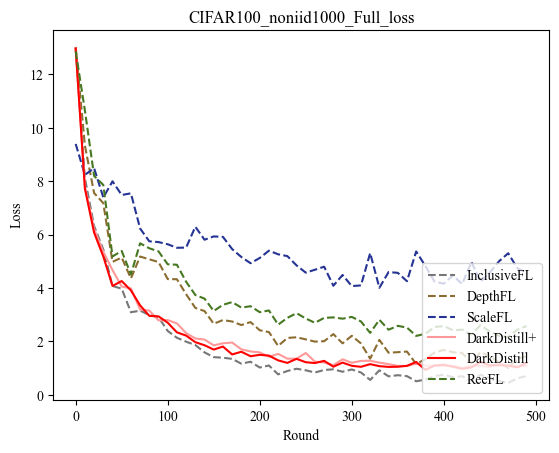

darkflpg
exclusivefl
reefl
depthfl
inclusivefl
darkflpa2
scalefl


<Figure size 640x480 with 0 Axes>

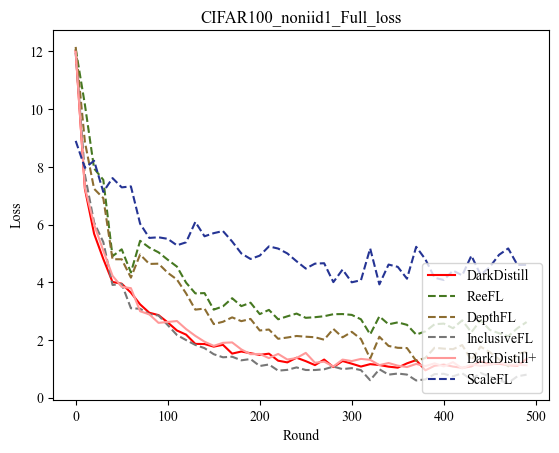

darkflpa2
exclusivefl
reefl
depthfl
scalefl
inclusivefl
darkflpg


<Figure size 640x480 with 0 Axes>

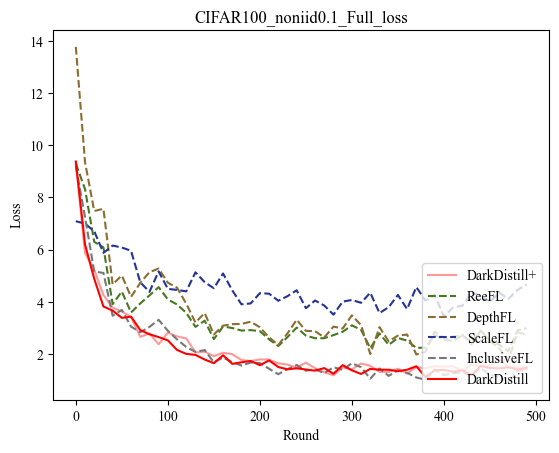

darkflpa2
exclusivefl
inclusivefl
reefl
depthfl
scalefl
darkflpg


<Figure size 640x480 with 0 Axes>

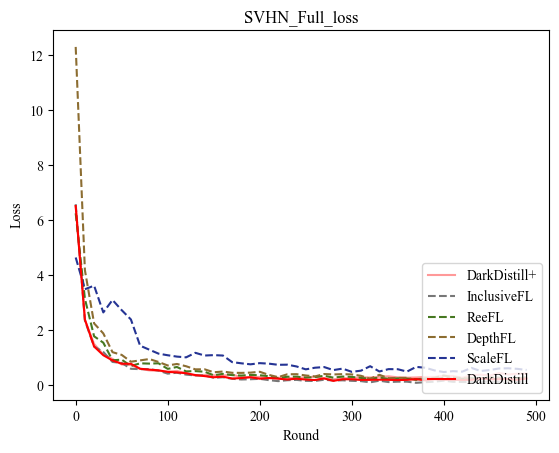

inclusivefl
scalefl
depthfl
darkflpg
reefl
darkflpa2
exclusivefl


<Figure size 640x480 with 0 Axes>

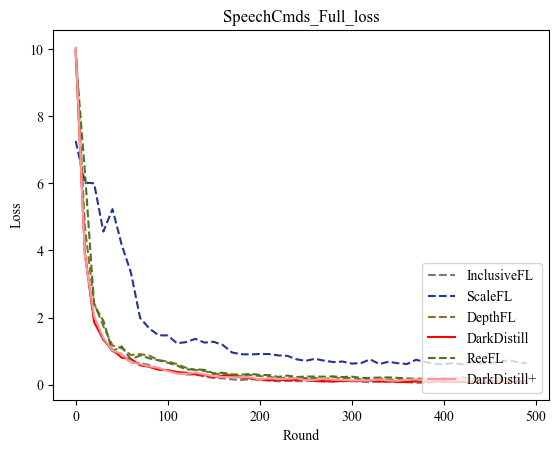

<Figure size 640x480 with 0 Axes>

In [9]:
# == LOSS ==
cifar_Full_loss_1000()
cifar_Full_loss_1()
cifar_Full_loss_01()
svhn_Full_loss()
speechcmds_Full_loss()